In [2]:
import json
from pathlib import Path
import os 
import sys
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import umap

import warnings
warnings.filterwarnings("ignore")

/Users/alicedriessen/.virtualenvs/test_cmonge/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
BLACK = False 

if BLACK: 
    plt.style.use('dark_background')
else: 
    matplotlib.style.use("fivethirtyeight")
    matplotlib.pyplot.rcParams['savefig.facecolor'] = 'white'
    sns.set_style("whitegrid")

matplotlib.rcParams['font.family'] = "monospace"
matplotlib.rcParams['figure.dpi'] = 300
sns.set_context("poster")

# 4i Benchmark

In [4]:
file_path = Path("/Users/alicedriessen/Box/otperturb/benedek-archive/ot-perturb/logs/4i/test_monge_new.json")
with open(file_path, "r") as file:
    monge = json.load(file)


file_path = Path("/Users/alicedriessen/Box/otperturb/benedek-archive/ot-perturb/logs/4i/test_ae_new.json")
with open(file_path, "r") as file:
    ae = json.load(file)



file_path = Path("/Users/alicedriessen/Box/otperturb/benedek-archive/ot-perturb/logs/4i/test_dual_union.json")
with open(file_path, "r") as file:
     dual= json.load(file)
file_path = Path("/Users/alicedriessen/Box/otperturb/benedek-archive/ot-perturb/logs/4i/test_identity_new.json")
with open(file_path, "r") as file:
     ide = json.load(file)

In [5]:
data = {"drug":[], "model": [], "wasserstein":[], "mmd":[], "r2":[], "drug signature": [], "sinkhorn div": []}
exps = monge["experiments"] + ae["experiments"] + dual["experiments"] + ide["experiments"]
for exp in exps:
    data["drug"].append(exp["drug"])
    data["mmd"].append(exp["mean_statistics"]["mean_mmd"])
    data["wasserstein"].append(exp["mean_statistics"]["mean_wasserstein"])
    data["r2"].append(exp["mean_statistics"]["mean_r2"])
    data["drug signature"].append(exp["mean_statistics"]["mean_drug_signature"])
    data["sinkhorn div"].append(exp["mean_statistics"]["mean_sinkhorn div"])

models = ["Monge"] * 35 + ["AE"] * 35  + ["cellOT"] * 35  + ["Identity"] * 35
data["model"] = models

In [6]:
df = pd.DataFrame(data)
df

drug     model  wasserstein       mmd        r2  \
0                  cisplatin     Monge     2.240693  0.007778  0.895511   
1         cisplatin_olaparib     Monge     2.279414  0.008010  0.921947   
2                 crizotinib     Monge     2.724159  0.010781  0.993448   
3                 dabrafenib     Monge     2.167839  0.007661  0.943518   
4                dacarbazine     Monge     2.222479  0.007877  0.863768   
..                       ...       ...          ...       ...       ...   
135   trametinib_midostaurin  Identity     3.148341  0.044985  0.600367   
136  trametinib_panobinostat  Identity     2.835896  0.051919  0.662731   
137              ulixertinib  Identity     3.125117  0.057321  0.636760   
138  vemurafenib_cobimetinib  Identity     3.006187  0.045176  0.559941   
139                vindesine  Identity     2.735377  0.020341  0.631669   

     drug signature  sinkhorn div  
0          0.328795      1.705432  
1          0.278758      1.746893  
2          0.349548      2.194651  
3          0.331609      1.633139  
4          0.330537      1.688417  
..              ...           ...  
135        1.493308      2.615214  
136        1.509529      2.302526  
137        1.839080      2.588554  
138        1.566925      2.470211  
139        0.858597      2.203449  

[140 rows x 7 columns]

In [7]:
#df = df[["wasserstein", "mmd", "r2","drug signature","sinkhorn div", "model"]]
#df.groupby("model").mean()

In [8]:
#df = df[["wasserstein", "mmd", "r2","drug signature","sinkhorn div", "model"]]
#df.groupby("model").std()
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titleweight"] = "bold"

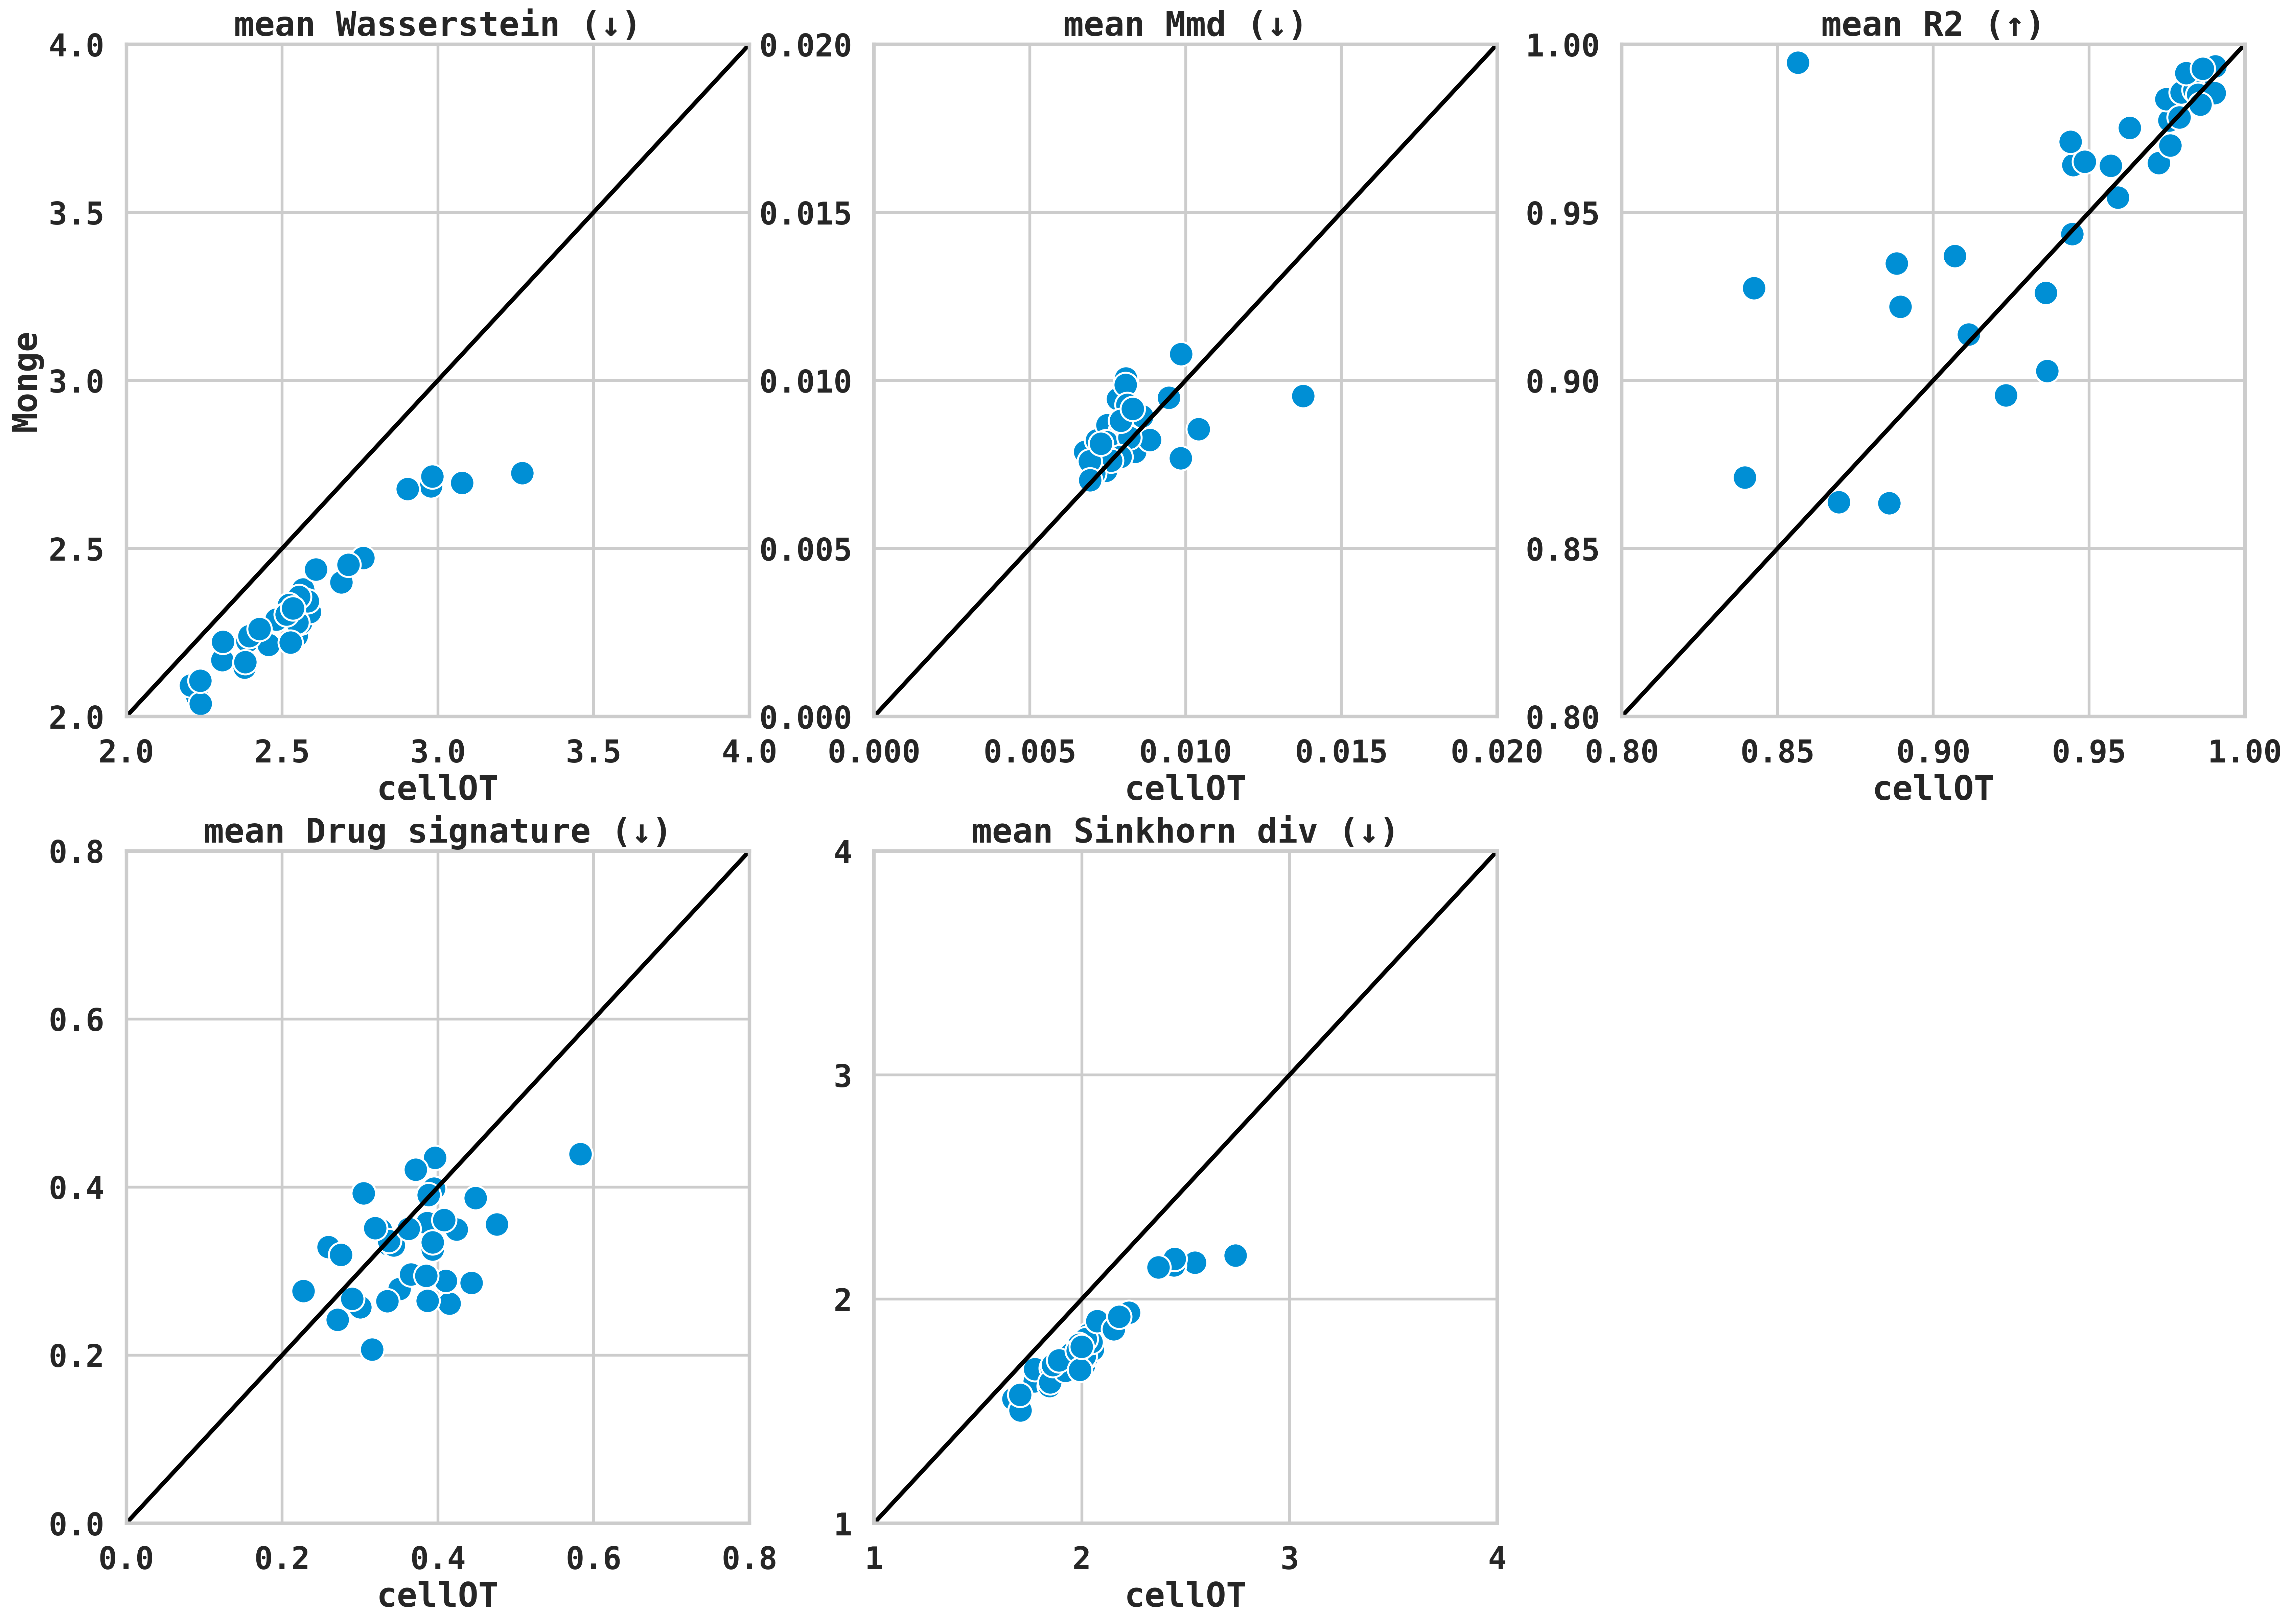

In [9]:
metrics = ["wasserstein", "mmd", "r2", "drug signature", "sinkhorn div"]

#
fig, ax = plt.subplots(2, 3, figsize=(24, 18))
#ax = [plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2),
#       plt.subplot2grid((2,6), (0,2), colspan=2), 
#       plt.subplot2grid((2,6), (0,4), colspan=2),
#       plt.subplot2grid((2,6), (1,1), colspan=2), 
#       plt.subplot2grid((2,6), (1,3), colspan=2)]
fig.delaxes(ax[1][2])
arrow = ["↓", "↓", "↑", "↓", "↓"]
for i, metric in enumerate(metrics):
    if i < 5:
        pivot = df[df["model"].isin(["cellOT", "Monge"])].pivot(index="drug", columns='model', values=metric)
        sns.scatterplot(pivot, x="cellOT", y="Monge", ax=ax[i//3][i%3], s=300)
        lims = [min(pivot["cellOT"].values + pivot["Monge"].values), max(pivot["cellOT"].values + pivot["Monge"].values)]
        ax[i//3][i%3].set(title=f"mean {metric.capitalize()} ({arrow[i]})", ylabel="")
        if i == 0:
            lims = [2,4]
            ticks = [2, 2.5, 3, 3.5, 4]
            ax[i//3][i%3].set(xlim=lims, ylim=lims, xticks=ticks, yticks=ticks, ylabel="Monge", xlabel="cellOT")
        if i == 1:
            lims = [0, 0.02]
            ticks = [0, 0.005, 0.010, 0.015, 0.020]
            ax[i//3][i%3].set(xlim=lims, ylim=lims, xticks=ticks, yticks=ticks, xlabel="cellOT")
        if i == 2:
            lims = [0.8, 1]
            ticks = [0.8, 0.85, 0.9, 0.95, 1]
            ax[i//3][i%3].set(xlim=lims, ylim=lims, xticks=ticks, yticks=ticks, xlabel="cellOT")
        if i ==3:
            lims = [0, 0.8]
            ticks = [0, 0.2, 0.4, 0.6, 0.8]
            ax[i//3][i%3].set(xlim=lims, ylim=lims, xticks=ticks, yticks=ticks, xlabel="cellOT")
        if i ==4:
            lims = [1, 4]
            ticks = [1, 2, 3, 4]
            ax[i//3][i%3].set(xlim=lims, ylim=lims, xticks=ticks, yticks=ticks, xlabel="cellOT")
        x_values = np.linspace(0, lims[1], 100)
        y_values = x_values

        ax[i//3][i%3].plot(x_values, y_values, color="black")

        #ax[i].grid(True)
        # better = sum(pivot["cellOT"] < pivot["Monge"])
        # sum_exp = pivot["Monge"].count()
        # if metric in ["wasserstein", "mmd", "drug signature", "sinkhorn div"]:
        #     exp = "(lower the better)"
        # if metric in ["r2"]:
        #     exp = "(higher the better)"
        #print(f"Number of drugs, when neural cellOT achieved a lower {metric} score: {better} out of {sum_exp}, {exp}")

path = Path("/Users/alicedriessen/Box/otperturb/alice_exp/figures/4i_benchmark_scatter.pdf")
plt.savefig(path, dpi=300, format='pdf', bbox_inches='tight')

In [10]:
df["r2"] = df["r2"].apply(lambda x: 2 * x - 1)

In [11]:
df[["model", "r2"]].groupby("model").std()

r2
model             
AE        0.110797
Identity  0.209536
Monge     0.087050
cellOT    0.104886

In [12]:
df[["model", "r2"]].groupby("model").mean("r2")

r2
model             
AE        0.804840
Identity  0.309315
Monge     0.901186
cellOT    0.878339

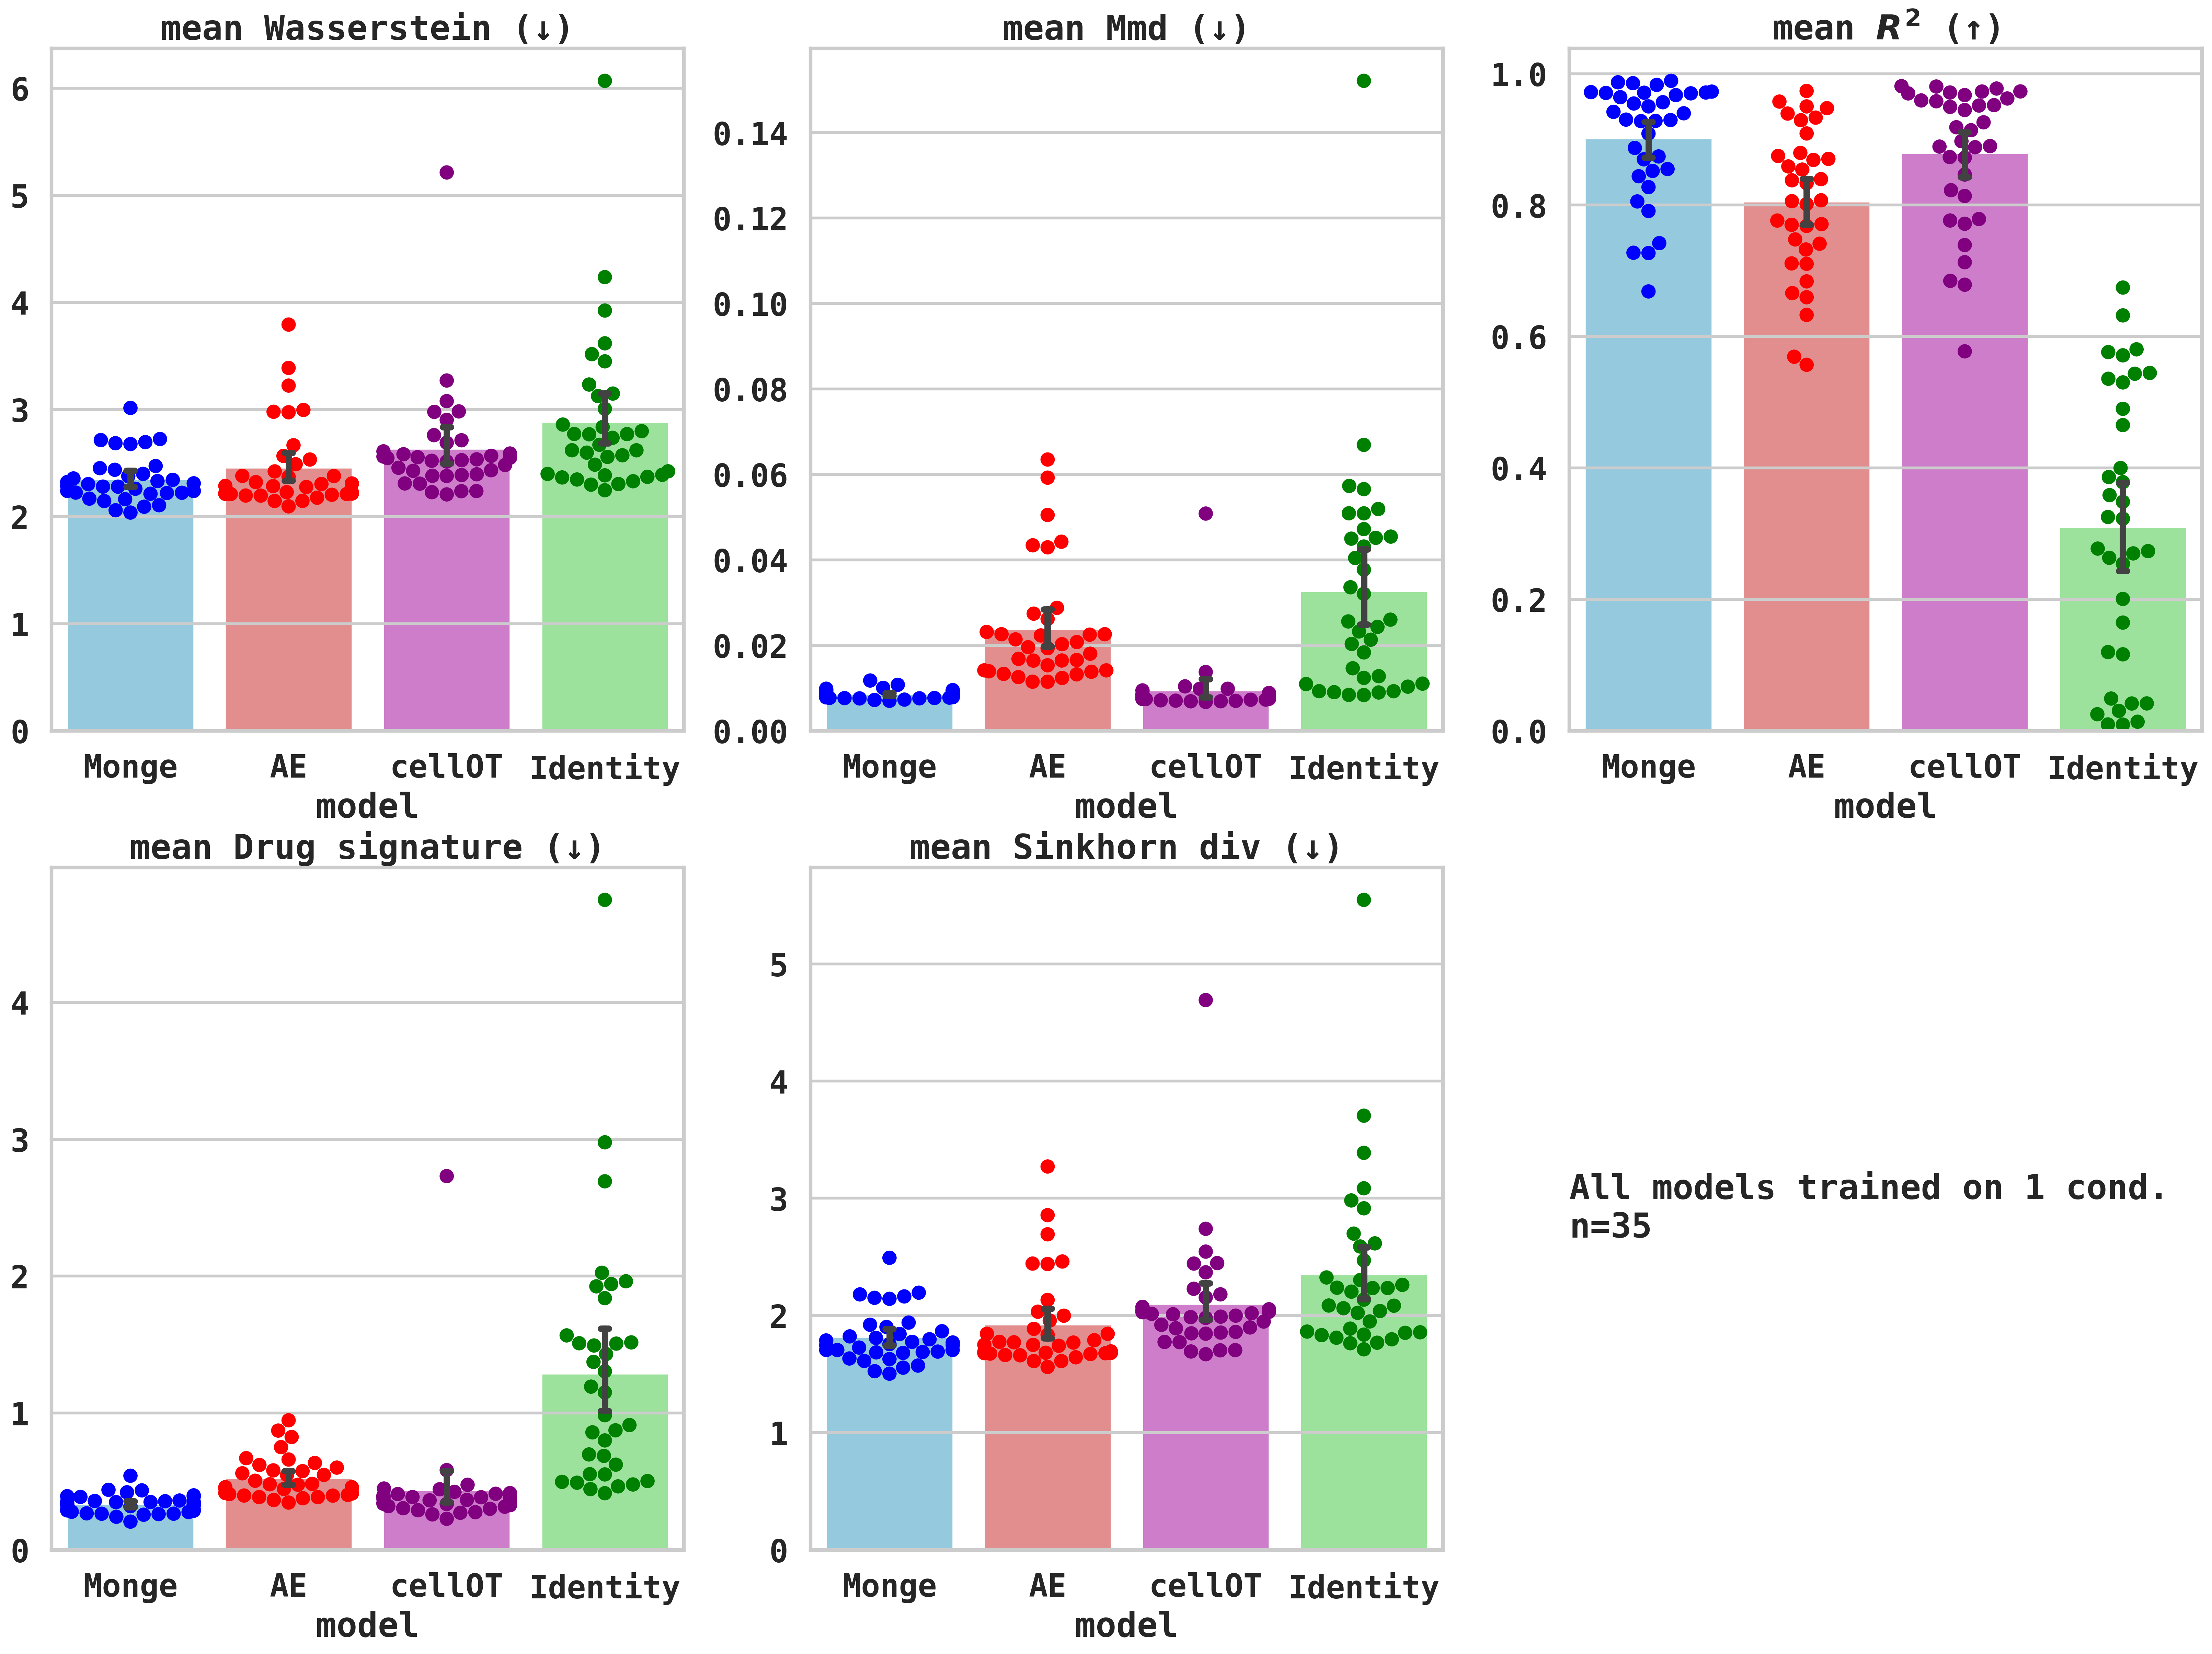

In [13]:
#fig, ax = plt.subplots(1, 5, figsize=(24, 5))
fig, ax = plt.subplots(2, 3, figsize=(24, 18))

# fig.delaxes(ax[1][2])
arrow = ["↓", "↓", "↑", "↓", "↓"]

for i, metric in enumerate(metrics):
    if i <5:
        sns.barplot(df, x="model", y=metric, ax=ax[i//3][i%3], zorder=0, hue="model", palette=["skyblue", "lightcoral", "orchid", "lightgreen"], capsize=.05, linewidth=0.6)
        sns.swarmplot(df, x="model", y=metric, ax=ax[i//3][i%3], zorder=1, hue="model", palette=["blue", "red", "purple", "green"], s=10)
        ax[i//3][i%3].set(title=f"mean {metric.capitalize()} ({arrow[i]})", ylabel="")

ax[0][2].set_title("mean $R^2$ (↑)")
ax[1][2].axis("off") # off
ax[1][2].annotate('All models trained on 1 cond. \nn=35', (0, 0.5), xycoords='axes fraction', va='center')


path = Path("/Users/alicedriessen/Box/otperturb/alice_exp/figures/4i_benchmark_bar.pdf")
plt.savefig(path, dpi=300, format='pdf', bbox_inches='tight')

In [14]:
df.groupby("model").mean(numeric_only=True)

wasserstein       mmd        r2  drug signature  sinkhorn div
model                                                                  
AE           2.454991  0.023752  0.804840        0.523046      1.920980
Identity     2.881015  0.032611  0.309315        1.285359      2.346878
Monge        2.345471  0.008538  0.901186        0.333373      1.811897
cellOT       2.631555  0.009382  0.878339        0.432916      2.097298

In [15]:
df.groupby("model").std(numeric_only=True)

wasserstein       mmd        r2  drug signature  sinkhorn div
model                                                                  
AE           0.396035  0.013623  0.110797        0.149735      0.397722
Identity     0.736132  0.027245  0.209536        0.891405      0.737981
Monge        0.219431  0.001030  0.087050        0.066974      0.220869
cellOT       0.512481  0.007334  0.104886        0.405583      0.514768

# Sciplex benchmark

In [16]:
file_path = Path("/Users/alicedriessen/Box/otperturb/benedek-archive/ot-perturb/logs/sciplex/test_monge_grand.json")
with open(file_path, "r") as file:
    monge = json.load(file)


file_path = Path("/Users/alicedriessen/Box/otperturb/benedek-archive/ot-perturb/logs/sciplex/test_ae_grand.json")
with open(file_path, "r") as file:
    ae = json.load(file)


file_path = Path("/Users/alicedriessen/Box/otperturb/benedek-archive/ot-perturb/logs/sciplex/test_identity_grand.json")
with open(file_path, "r") as file:
    ide = json.load(file)



file_path = Path("/Users/alicedriessen/Box/otperturb/benedek-archive/ot-perturb/logs/sciplex/test_dual_grand.json")
with open(file_path, "r") as file:
    dual = json.load(file)

In [17]:
data = {"drug":[], "model": [], "wasserstein":[], "mmd":[], "r2":[], "drug signature": [], "sinkhorn div": []}
exps = monge["experiments"] + ae["experiments"] + dual["experiments"] + ide["experiments"] 
for exp in exps:
    data["drug"].append(exp["drug"])
    data["mmd"].append(exp["mean_statistics"]["mean_mmd"])
    data["wasserstein"].append(exp["mean_statistics"]["mean_wasserstein"])
    data["r2"].append(exp["mean_statistics"]["mean_r2"])
    data["drug signature"].append(exp["mean_statistics"]["mean_drug_signature"])
    data["sinkhorn div"].append(exp["mean_statistics"]["mean_sinkhorn div"])

models = ["monge"] * 36 + ["autoencoder"] * 36 + ["cellOT"] * 36 + ["identity"] * 36 
data["model"] = models

In [18]:
df = pd.DataFrame(data)
df

drug     model  wasserstein       mmd        r2  \
0        abexinostat-10     monge     2.690028  0.010676  0.951434   
1       abexinostat-100     monge     2.568897  0.007472  0.963968   
2      abexinostat-1000     monge     2.444975  0.011524  0.979977   
3     abexinostat-10000     monge     2.331936  0.018772  0.982445   
4         belinostat-10     monge     3.377296  0.009562  0.970712   
..                  ...       ...          ...       ...       ...   
139  tacedinaline-10000  identity     6.161451  0.018482  0.806717   
140       trametinib-10  identity     5.144459  0.020268  0.738585   
141      trametinib-100  identity     5.265925  0.026883  0.694915   
142     trametinib-1000  identity     5.134356  0.021623  0.748140   
143    trametinib-10000  identity     5.237649  0.024641  0.721198   

     drug signature  sinkhorn div  
0          0.481592      2.117440  
1          0.383051      1.999715  
2          0.264083      1.884448  
3          0.250378      1.776875  
4          0.616851      2.802857  
..              ...           ...  
139        2.162106      5.606525  
140        1.736118      4.604337  
141        1.962294      4.724621  
142        1.776654      4.593520  
143        1.857340      4.700274  

[144 rows x 7 columns]

In [19]:
df

drug     model  wasserstein       mmd        r2  \
0        abexinostat-10     monge     2.690028  0.010676  0.951434   
1       abexinostat-100     monge     2.568897  0.007472  0.963968   
2      abexinostat-1000     monge     2.444975  0.011524  0.979977   
3     abexinostat-10000     monge     2.331936  0.018772  0.982445   
4         belinostat-10     monge     3.377296  0.009562  0.970712   
..                  ...       ...          ...       ...       ...   
139  tacedinaline-10000  identity     6.161451  0.018482  0.806717   
140       trametinib-10  identity     5.144459  0.020268  0.738585   
141      trametinib-100  identity     5.265925  0.026883  0.694915   
142     trametinib-1000  identity     5.134356  0.021623  0.748140   
143    trametinib-10000  identity     5.237649  0.024641  0.721198   

     drug signature  sinkhorn div  
0          0.481592      2.117440  
1          0.383051      1.999715  
2          0.264083      1.884448  
3          0.250378      1.776875  
4          0.616851      2.802857  
..              ...           ...  
139        2.162106      5.606525  
140        1.736118      4.604337  
141        1.962294      4.724621  
142        1.776654      4.593520  
143        1.857340      4.700274  

[144 rows x 7 columns]

In [20]:
df["dose"] = df["drug"].apply(lambda x: x.split("-")[1])
df["drug1"] = df["drug"].apply(lambda x: x.split("-")[0])
df["model"] = df["model"].replace({"monge": "Monge","autoencoder": "scGen","dual": "cellOT","identity":"Identity"})
df["r2"] = df["r2"].apply(lambda x: 2 * x - 1)

In [21]:
df[["dose", "model", "r2"]].groupby(["model", "dose"]).std().reset_index().pivot(index="model",columns="dose", values="r2")

dose            10       100      1000     10000
model                                           
Identity  0.177220  0.276326  0.288103  0.189224
Monge     0.024210  0.043364  0.021673  0.027063
cellOT    0.013040  0.033595  0.016581  0.011864
scGen     0.106221  0.134474  0.067043  0.079243

In [22]:
df[["dose", "model", "r2"]].groupby(["model", "dose"]).mean().reset_index().pivot(index="model",columns="dose", values="r2")


dose            10       100      1000     10000
model                                           
Identity  0.665502  0.574888  0.425820  0.215004
Monge     0.946750  0.931338  0.951388  0.961742
cellOT    0.968537  0.955094  0.962100  0.971511
scGen     0.859475  0.839439  0.847063  0.885521

In [23]:
df

drug     model  wasserstein       mmd        r2  \
0        abexinostat-10     Monge     2.690028  0.010676  0.902867   
1       abexinostat-100     Monge     2.568897  0.007472  0.927936   
2      abexinostat-1000     Monge     2.444975  0.011524  0.959954   
3     abexinostat-10000     Monge     2.331936  0.018772  0.964890   
4         belinostat-10     Monge     3.377296  0.009562  0.941425   
..                  ...       ...          ...       ...       ...   
139  tacedinaline-10000  Identity     6.161451  0.018482  0.613434   
140       trametinib-10  Identity     5.144459  0.020268  0.477170   
141      trametinib-100  Identity     5.265925  0.026883  0.389831   
142     trametinib-1000  Identity     5.134356  0.021623  0.496280   
143    trametinib-10000  Identity     5.237649  0.024641  0.442396   

     drug signature  sinkhorn div   dose         drug1  
0          0.481592      2.117440     10   abexinostat  
1          0.383051      1.999715    100   abexinostat  
2          0.264083      1.884448   1000   abexinostat  
3          0.250378      1.776875  10000   abexinostat  
4          0.616851      2.802857     10    belinostat  
..              ...           ...    ...           ...  
139        2.162106      5.606525  10000  tacedinaline  
140        1.736118      4.604337     10    trametinib  
141        1.962294      4.724621    100    trametinib  
142        1.776654      4.593520   1000    trametinib  
143        1.857340      4.700274  10000    trametinib  

[144 rows x 9 columns]

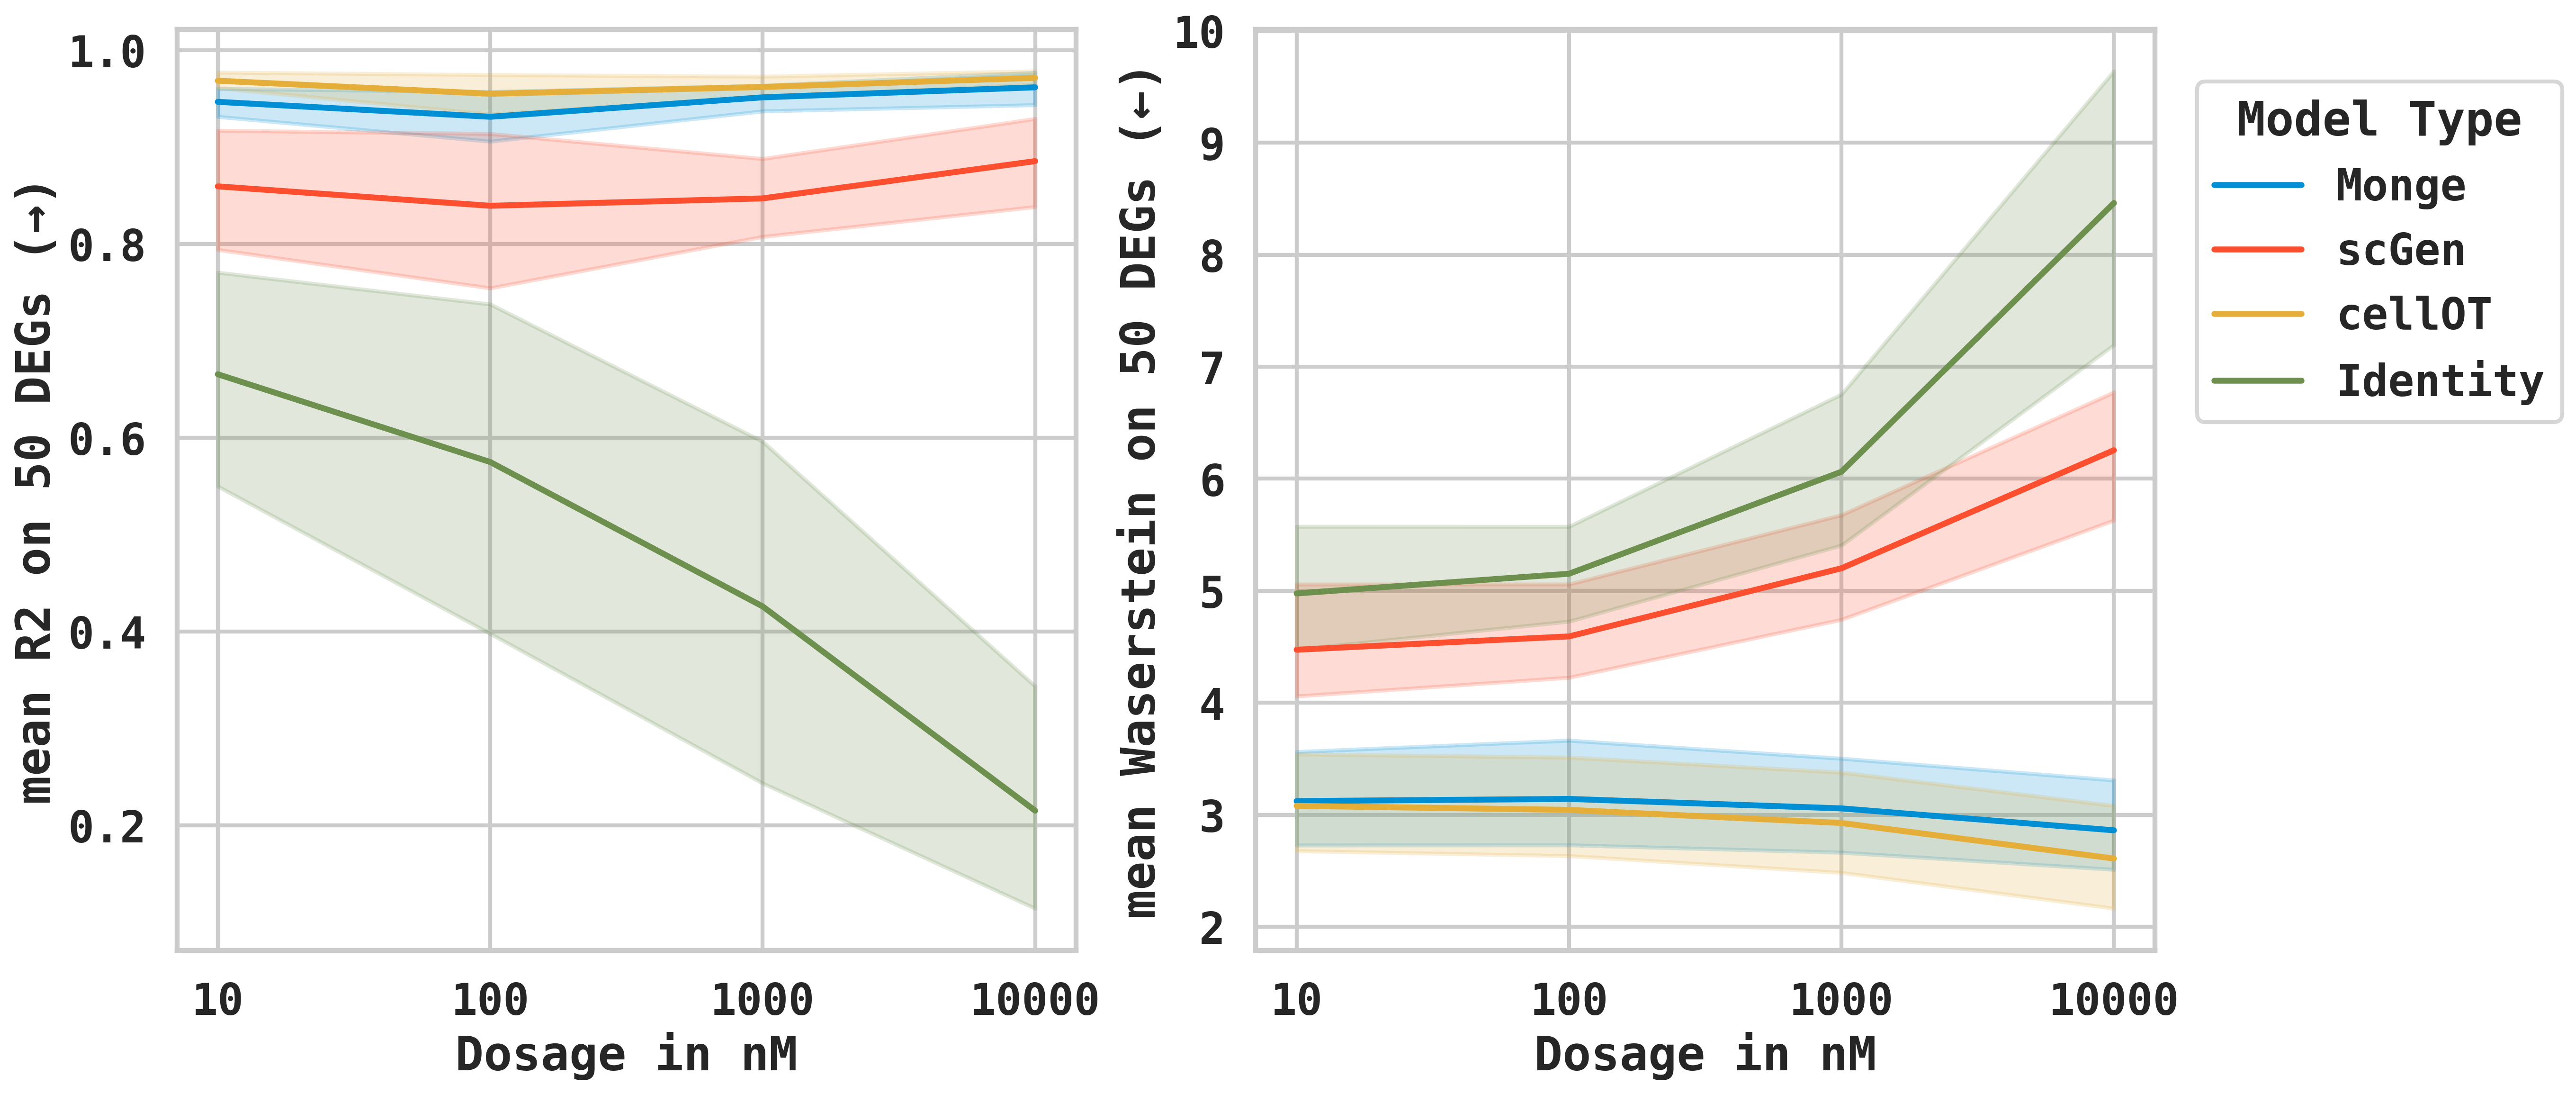

In [ ]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
fig, ax = plt.subplots(1, 2, figsize=(16,8))
sns.lineplot(df, x="dose", y="r2", hue="model", ax=ax[0])
ax[0].get_legend().remove()
ax[0].set(xlabel="Dosage in nM", ylabel="mean R2 on 50 DEGs (→)")

sns.lineplot(df, x="dose", y="wasserstein", hue="model", ax=ax[1])
ax[1].set(xlabel="Dosage in nM", ylabel="mean Waserstein on 50 DEGs (←)")
sns.move_legend(
    ax[1], "lower center",
    bbox_to_anchor=(1.25, 0.55), ncol=1, title="Model Type", frameon=True,
)
fig.savefig('/Users/alicedriessen/Box/otperturb/alice_exp/figures/sciplex_benchmark.pdf', format='pdf', dpi=300, bbox_inches='tight')

In [33]:
# df = df[["wasserstein", "r2", "model"]]
# df

In [34]:
df["model"].unique()

array(['Monge', 'scGen', 'cellOT', 'Identity'], dtype=object)

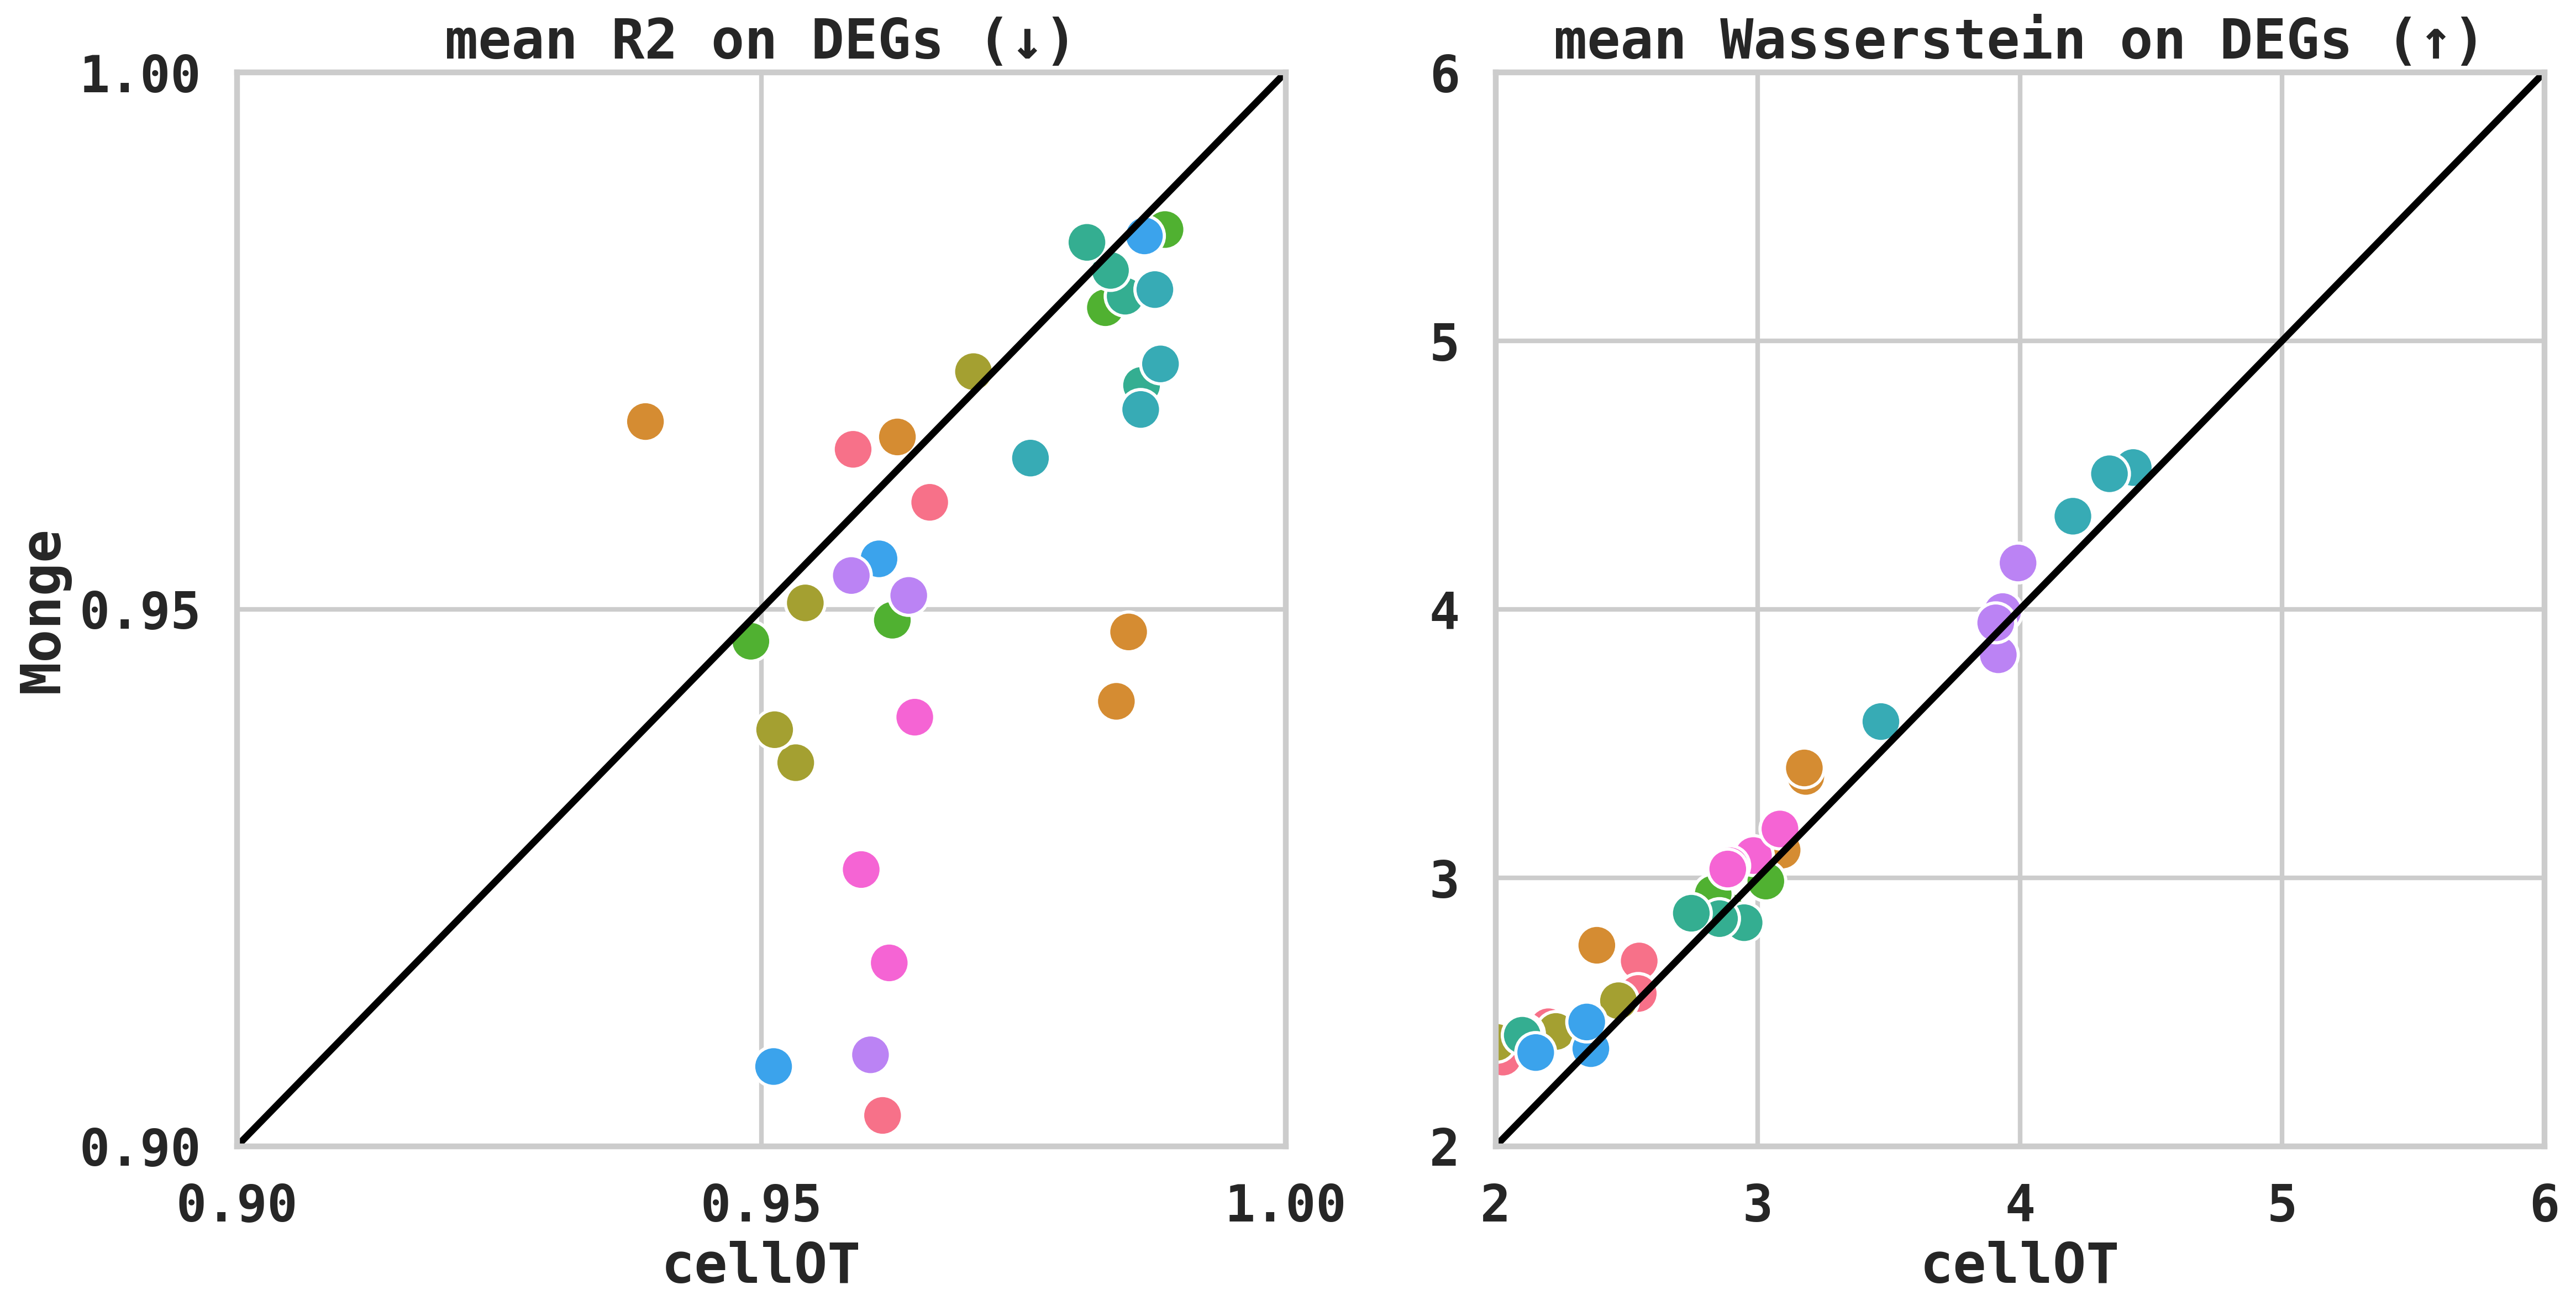

In [ ]:
metrics = ["r2", "wasserstein"]
arrow=["↓","↑"]
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
for i, metric in enumerate(metrics):
    pivot = df[df["model"].isin(["cellOT", "Monge"])].pivot(index="drug", columns='model', values=metric)
    pivot["drug"] = pivot.index
    pivot["dose"] = pivot["drug"].apply(lambda x: x.split("-")[1])
    pivot["drug"] = pivot["drug"].apply(lambda x: x.split("-")[0])
    g = sns.scatterplot(pivot, x="cellOT", y="Monge", ax=ax[i], hue="drug", s=300)
    ax[i].set(title=f"mean {metric.capitalize()} on DEGs ({arrow[i]})", ylabel="")
    ax[i].set_title(f"mean {metric.capitalize()} on DEGs ({arrow[i]})",weight='bold')
    ax[i].get_legend().remove()
    if i ==1:
            lims = [2,6]
            ticks = [2, 3, 4, 5, 6]
            ax[i].set(xlim=lims, ylim=lims, xticks=ticks, yticks=ticks, xlabel="cellOT")
    if i == 0:
            lims = [0.9, 1]
            ticks = [0.9, 0.95, 1]
            ax[i].set(xlim=lims, ylim=lims, xticks=ticks, yticks=ticks, ylabel="Monge", xlabel="cellOT")
    x_values = np.linspace(0, lims[1], 100)
    y_values = x_values

    ax[i].plot(x_values, y_values, color="black")
fig.savefig('/Users/alicedriessen/Box/otperturb/alice_exp/figures/sciplex_benchmark-scatter.pdf', format='pdf', dpi=300, bbox_inches='tight')

In [36]:
df["drug"] = df["drug"].apply(lambda x: x.capitalize())

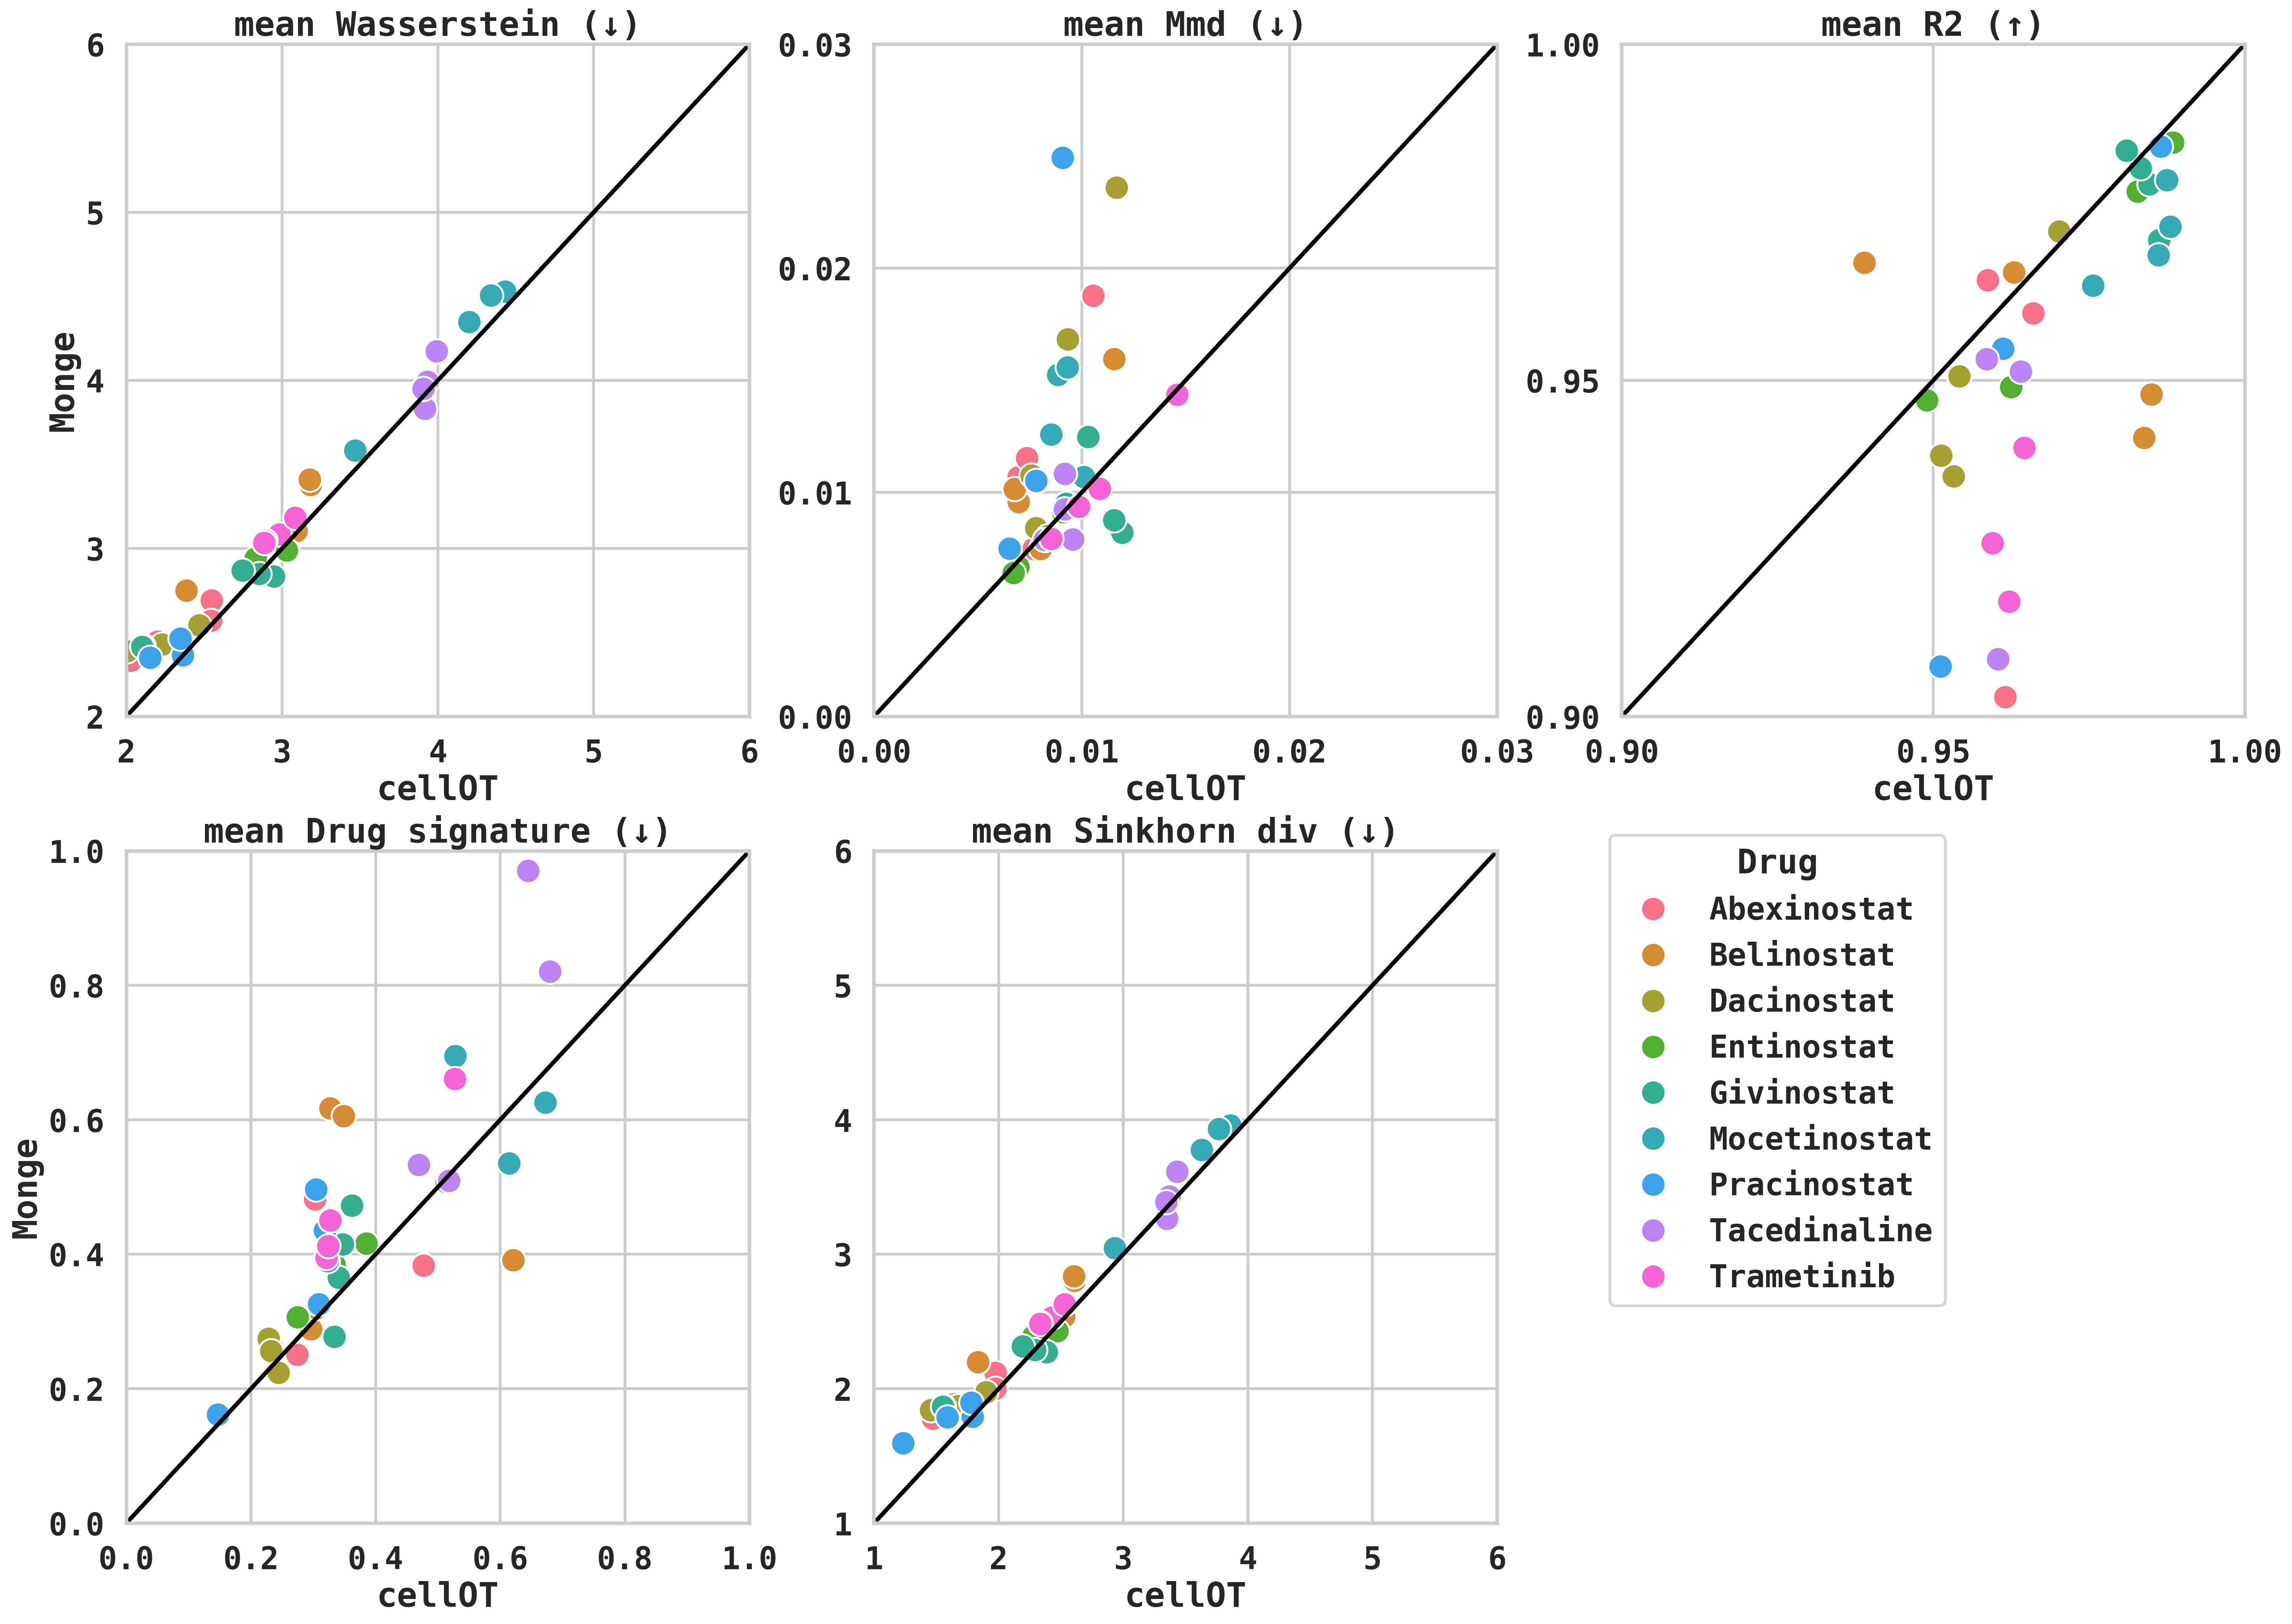

In [ ]:

sns.color_palette("viridis", as_cmap=True)

metrics = ["wasserstein", "mmd", "r2", "drug signature", "sinkhorn div"]
fig, ax = plt.subplots(2, 3, figsize=(24, 18))

fig.delaxes(ax[1][2])
arrow = ["↓", "↓", "↑", "↓", "↓"]
#fig, ax = plt.subplots(1, 5, figsize=(24, 5))
flags = [False, False, True, False, False]
for i, metric in enumerate(metrics):
    if i < 5:
        pivot = df[df["model"].isin(["cellOT", "Monge"])].pivot(index="drug", columns='model', values=metric)
        pivot["drug"] = pivot.index
        pivot["dose"] = pivot["drug"].apply(lambda x: x.split("-")[1])
        pivot["drug"] = pivot["drug"].apply(lambda x: x.split("-")[0])
        g = sns.scatterplot(pivot, x="cellOT", y="Monge", ax=ax[i//3][i%3], hue="drug", legend=flags[i], s=300)
        ax[i//3][i%3].set(title=f"mean {metric.capitalize()} ({arrow[i]})", ylabel="")
        lims = [min(pivot["cellOT"].values + pivot["Monge"].values), max(pivot["cellOT"].values + pivot["Monge"].values)]
        if i == 0:
            lims = [2,6]
            ticks = [2, 3, 4, 5, 6]
            ax[i//3][i%3].set(xlim=lims, ylim=lims, xticks=ticks, yticks=ticks,ylabel="Monge")
        if i == 1:
            lims = [0, 0.03]
            ticks = [0, 0.01, 0.02, 0.02, 0.03]
            ax[i//3][i%3].set(xlim=lims, ylim=lims, xticks=ticks, yticks=ticks)
        if i == 2:
            lims = [0.9, 1]
            ticks = [0.9, 0.95, 1]
            ax[i//3][i%3].set(xlim=lims, ylim=lims, xticks=ticks, yticks=ticks)
        if i ==3:
            lims = [0, 1]
            ticks = [0, 0.2, 0.4, 0.6, 0.8, 1]
            ax[i//3][i%3].set(xlim=lims, ylim=lims, xticks=ticks, yticks=ticks, ylabel="Monge")
        if i ==4:
            lims = [1, 6]
            ticks = [1, 2, 3, 4, 5, 6]
            ax[i//3][i%3].set(xlim=lims, ylim=lims, xticks=ticks, yticks=ticks)
        x_values = np.linspace(0, lims[1], 100)
        y_values = x_values

        ax[i//3][i%3].plot(x_values, y_values, color="black")

        #ax[i].grid(True)
        #better = sum(pivot["dual"] < pivot["monge"])
        #sum_exp = pivot["monge"].count()
        #if metric in ["wasserstein", "mmd", "drug signature", "sinkhorn div"]:
        #    exp = "(lower the better)"
        #if metric in ["r2"]:
        #    exp = "(higher the better)"
        #print(f"Number of drugs, when neural dual achieved a lower {metric} score: {better} out of {sum_exp}, {exp}")
    # for i in range(5):
    #     ax[i].get_legend().remove()

path = Path("/Users/alicedriessen/Box/otperturb/alice_exp/figures/sciplex_benchmark_metrics_scatter.pdf")
sns.move_legend(
    ax[0][2], "lower center",
    bbox_to_anchor=(0.25, -0.9), ncol=1, title="Drug", frameon=True,
)
plt.savefig(path, dpi=300, format='pdf', bbox_inches='tight')

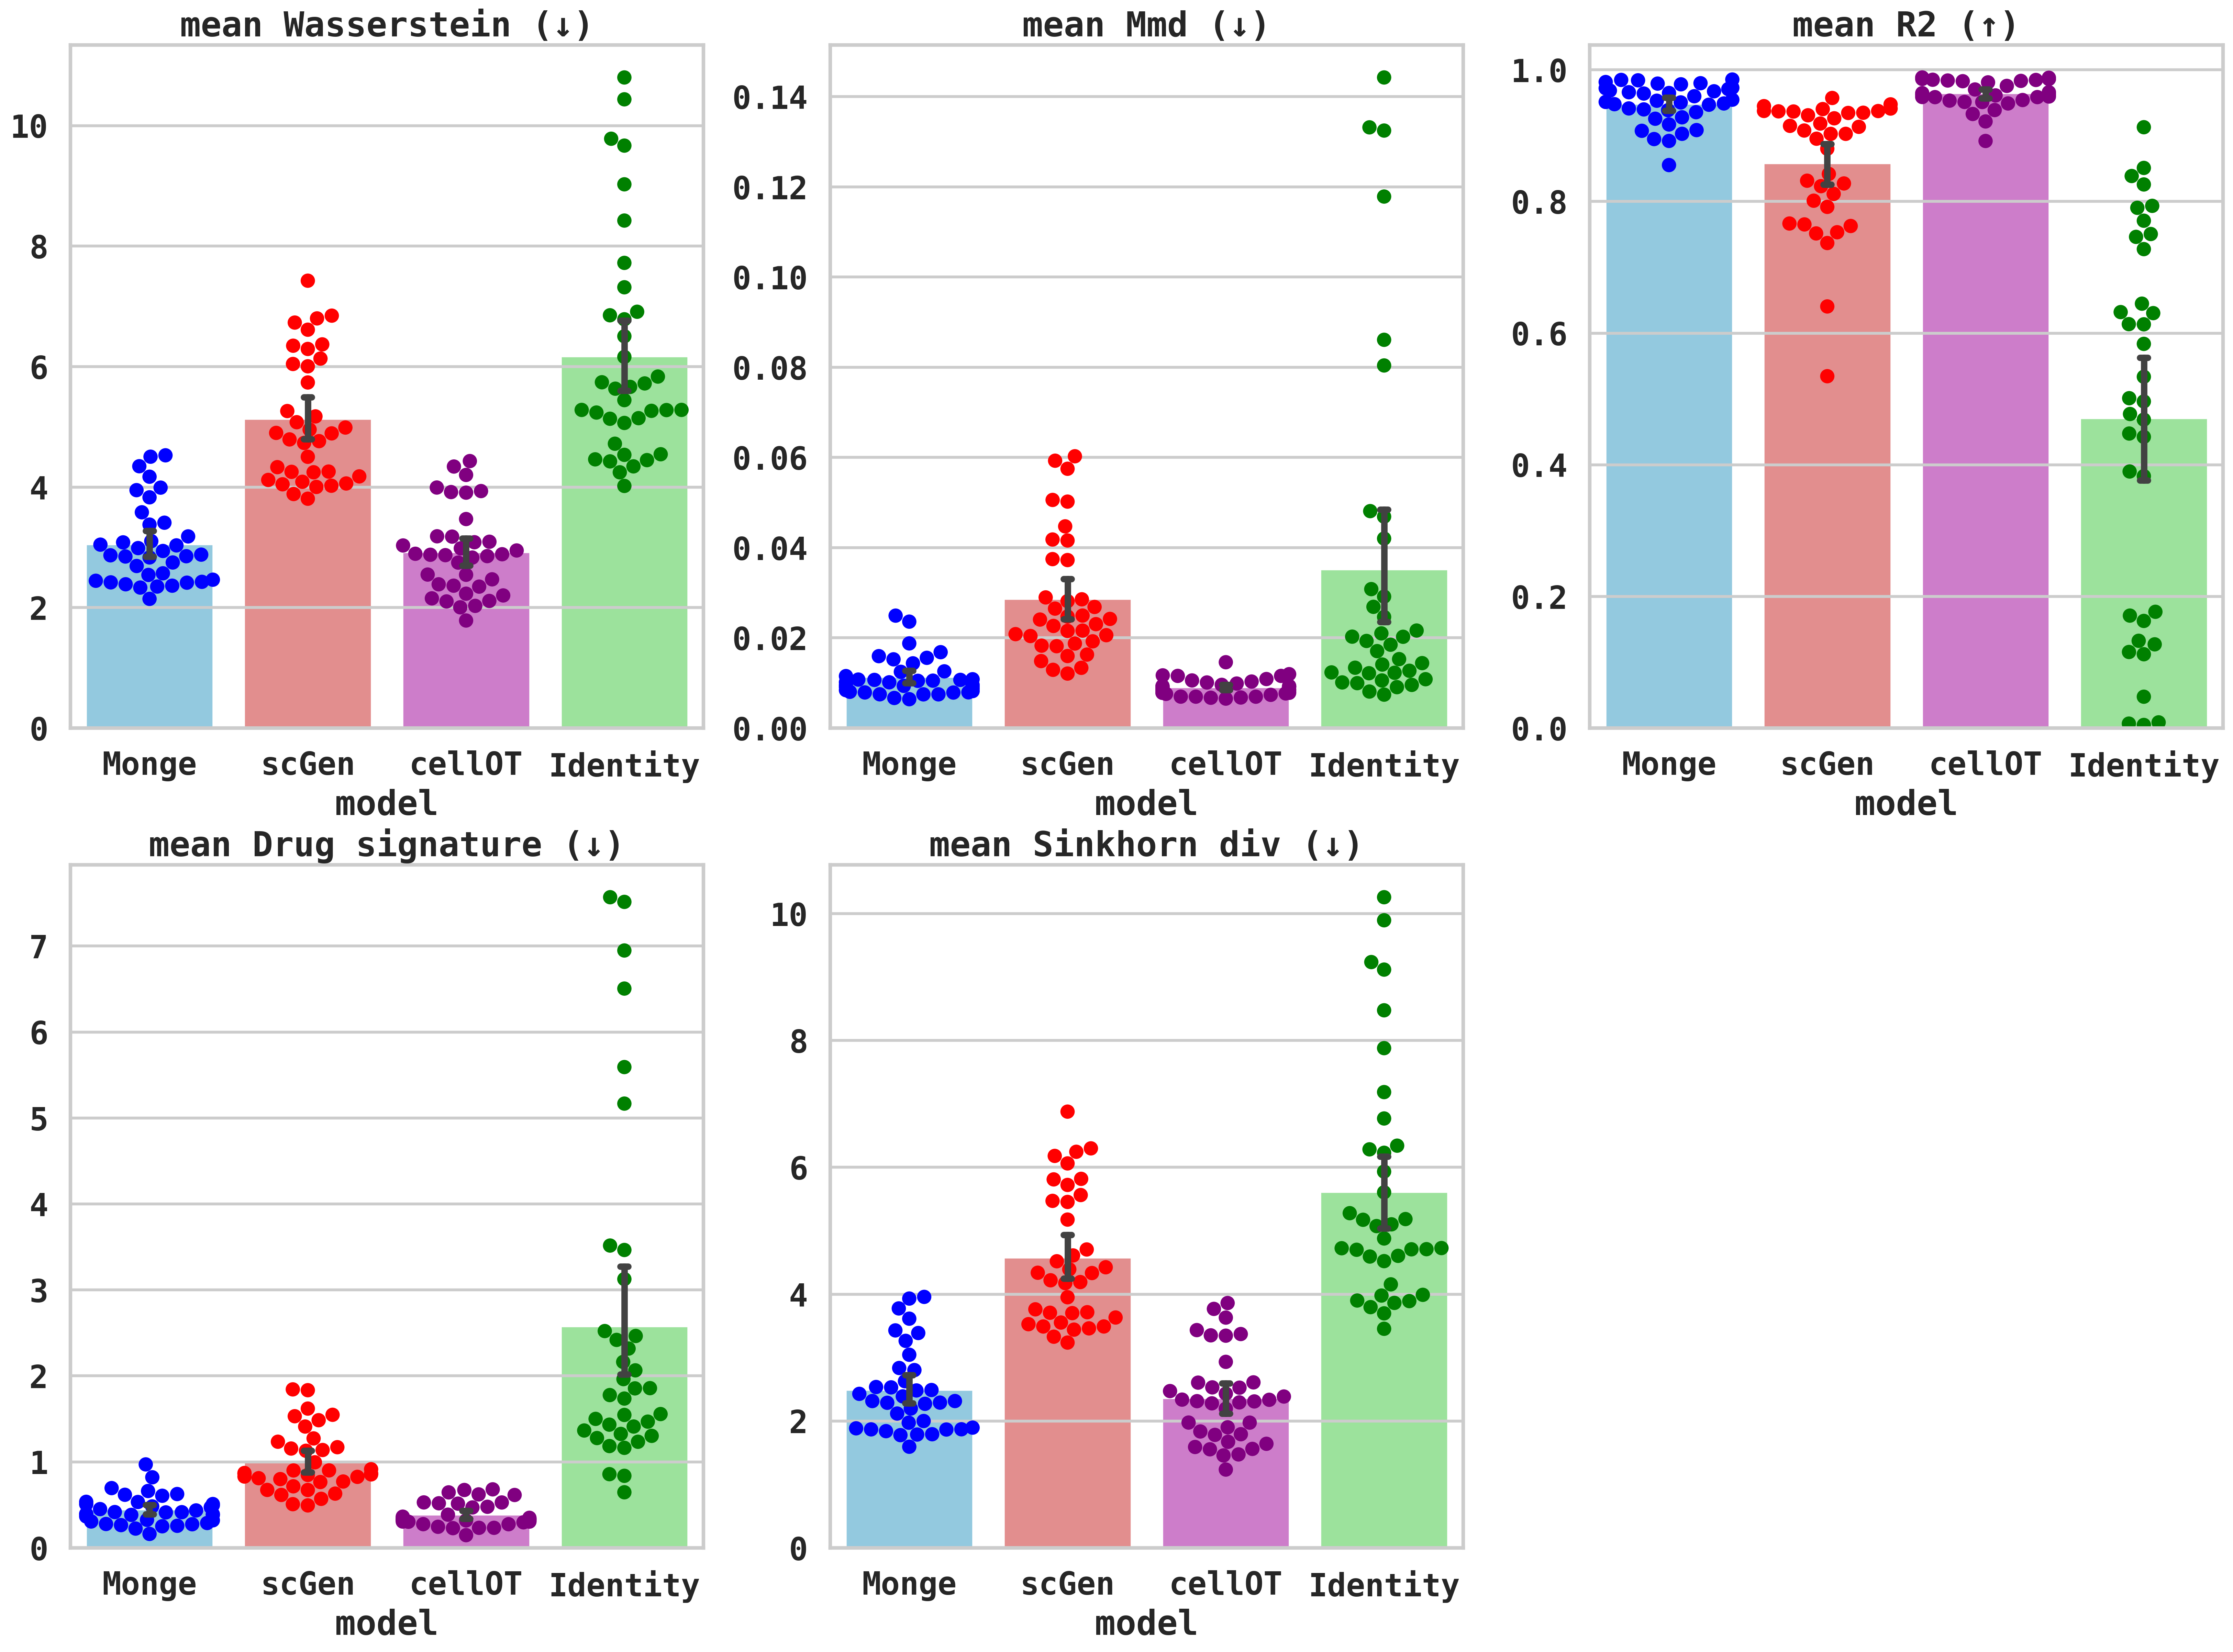

In [ ]:
# fig, ax = plt.subplots(1, 5, figsize=(24, 5))

# for i, metric in enumerate(metrics):
#         sns.barplot(df, x="model", y=metric, ax=ax[i], zorder=0, hue="model", palette=["skyblue", "lightcoral", "orchid", "lightgreen"], capsize=.05, linewidth=0.6)
#         sns.swarmplot(df, x="model", y=metric, ax=ax[i], zorder=1, hue="model", palette=["blue", "red", "purple", "green"])
#         ax[i].set(title=f"mean {metric}", ylabel="")

# path = Path("/Users/alicedriessen/Box/otperturb/alice_exp/figures/sciplex_benchmark_bar.pdf")
# plt.savefig(path, dpi=300, format='pdf', bbox_inches='tight')


#fig, ax = plt.subplots(1, 5, figsize=(24, 5))
fig, ax = plt.subplots(2, 3, figsize=(24, 18))

fig.delaxes(ax[1][2])
arrow = ["↓", "↓", "↑", "↓", "↓"]

for i, metric in enumerate(metrics):
    if i <5:
        sns.barplot(df, x="model", y=metric, ax=ax[i//3][i%3], zorder=0, hue="model", palette=["skyblue", "lightcoral", "orchid", "lightgreen"], capsize=.05, linewidth=0.6)
        sns.swarmplot(df, x="model", y=metric, ax=ax[i//3][i%3], zorder=1, hue="model", palette=["blue", "red", "purple", "green"], s=10)
        ax[i//3][i%3].set(title=f"mean {metric.capitalize()} ({arrow[i]})", ylabel="")

path = Path("/Users/alicedriessen/Box/otperturb/alice_exp/figures/sciplex_benchmark_bar.pdf")
plt.savefig(path, dpi=300, format='pdf', bbox_inches='tight')

In [25]:
df = df[["wasserstein", "mmd", "r2","drug signature","sinkhorn div", "model", "dose"]]
df.groupby(["model", "dose"]).mean()

wasserstein       mmd        r2  drug signature  sinkhorn div
model    dose                                                                
Identity 10        4.975941  0.013260  0.665502        1.408435      4.416664
         100       5.151644  0.015360  0.574888        1.543522      4.593745
         1000      6.062466  0.028156  0.425820        2.326763      5.508494
         10000     8.461512  0.083559  0.215004        5.014127      7.917248
Monge    10        3.122048  0.009276  0.946750        0.469796      2.555221
         100       3.141306  0.010352  0.931338        0.504070      2.576531
         1000      3.056793  0.010249  0.951388        0.420876      2.496491
         10000     2.861228  0.015166  0.961742        0.372947      2.311211
cellOT   10        3.079467  0.008386  0.968537        0.372396      2.512622
         100       3.043473  0.009027  0.955094        0.428408      2.478616
         1000      2.926484  0.008383  0.962100        0.409571      2.366033
         10000     2.609388  0.010276  0.971511        0.324822      2.058997
scGen    10        4.473168  0.020114  0.859475        0.722913      3.909607
         100       4.592159  0.021777  0.839439        0.791582      4.029977
         1000      5.200429  0.029490  0.847063        1.027869      4.642175
         10000     6.254323  0.042857  0.885521        1.463166      5.705776

In [26]:
df = df[["wasserstein", "mmd", "r2","drug signature","sinkhorn div", "model", "dose"]]
df.groupby(["model", "dose"]).std()

wasserstein       mmd        r2  drug signature  sinkhorn div
model    dose                                                                
Identity 10        0.895665  0.004781  0.177220        0.539289      0.892725
         100       0.731404  0.007463  0.276326        0.477983      0.728684
         1000      1.102921  0.021882  0.288103        1.224363      1.102548
         10000     1.950473  0.050044  0.189224        2.286194      1.950810
Monge    10        0.689163  0.002536  0.024210        0.124294      0.688769
         100       0.716491  0.002984  0.043364        0.185616      0.714069
         1000      0.687891  0.003053  0.021673        0.105636      0.683992
         10000     0.661917  0.005998  0.027063        0.239044      0.661730
cellOT   10        0.687450  0.001819  0.013040        0.089152      0.686999
         100       0.703140  0.002583  0.033595        0.168791      0.701049
         1000      0.745944  0.000635  0.016581        0.150950      0.741970
         10000     0.747418  0.001005  0.011864        0.134162      0.747409
scGen    10        0.786794  0.004643  0.106221        0.132777      0.783983
         100       0.663164  0.005861  0.134474        0.180248      0.659383
         1000      0.740006  0.012246  0.067043        0.231156      0.737041
         10000     0.962985  0.015894  0.079243        0.311573      0.962375